# Getting the node information running

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
sns.set_palette('colorblind',10)
sns.set_context('notebook')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')
df.KICID = df['KICID'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Columns: 165 entries, KICID to Z
dtypes: bool(2), float64(145), int64(6), object(12)
memory usage: 6.9+ MB


In [4]:
nodes = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/nodelist.txt',skiprows=[1])
nodes.rename(columns={'Kepler_ID':'KICID'},inplace=True)
nodes.KICID = nodes['KICID'].astype('str')
df = pd.merge(df, nodes, how='left', on='KICID')
df.head()

,KICID,kepmag_x,Length_Quarters,Length_days,numax,numax_err,dnu,dnu_err,amplitude,err.2_x,...,Aks,Aj,Ah,H17_Ag,L,L_err,Mbol,Mbol_err,Z,Skygroup_ID_y
0,892760,13.23,6,380.8,29.48,0.48,3.962,0.116,149.7,8.3,...,0.016483,0.066545,0.033477,0.256763,72.126040,13.744428,0.104770,0.206899,0.010827,84
1,1026084,12.14,15,1139.0,41.17,0.90,4.414,0.061,63.8,2.9,...,0.015099,0.060960,0.030667,0.235211,81.549973,12.518103,-0.028560,0.166663,0.013321,84
2,1026452,12.94,18,1318.1,34.50,0.52,3.967,0.078,83.3,4.3,...,0.012224,0.049351,0.024827,0.190418,89.257932,13.550724,-0.126617,0.164831,0.013631,84
3,1160684,14.91,17,1308.7,26.38,0.97,3.361,0.223,121.1,8.3,...,0.042131,0.170094,0.085570,0.656301,35.568795,10.822204,0.872327,0.330347,0.014273,84
4,1160789,9.70,18,1318.1,24.72,0.62,3.509,0.048,149.0,7.3,...,0.025516,0.103015,0.051825,0.397480,51.595056,5.354783,0.468480,0.112683,0.009430,84


In [5]:
ccd = np.array([int((id- 1)/4) for id in df['Skygroup_ID'].values])

KeyError: 'Skygroup_ID'

NameError: name 'ccd' is not defined

/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


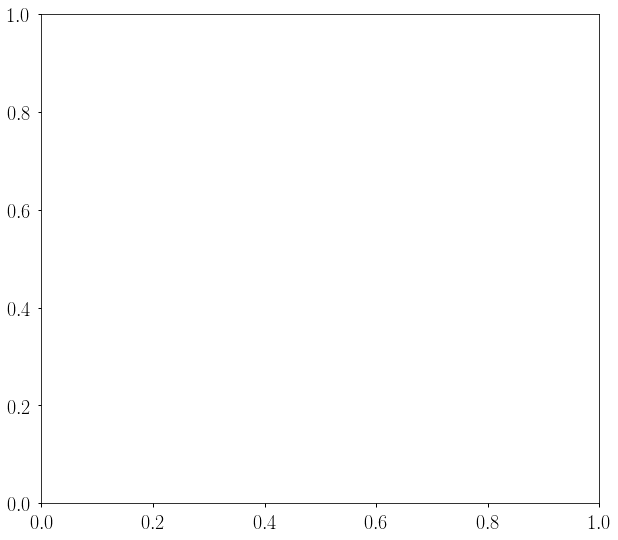

In [6]:
fig, ax = plt.subplots(figsize=(10,9))
c = ax.scatter(df.ra, df.dec, c=ccd, cmap= 'tab20b')
ax.set_xlabel('Ra')
ax.set_ylabel('Dec')
fig.colorbar(c, label='CCD')
plt.show()

In [1]:
import numpy as np
from matplotlib import pyplot as plt
n = np.array([100., 200.,300., 500.])
t = np.array([16, 17.5, 49.9, 161.35])
x = np.linspace(0., 6000., 1000.)
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

s = IUS(n, t)
y = s(x)

plt.scatter(n, t)
plt.plot(x, s(x))
plt.show()

print(np.round(s(5500),2) / 60 / 60)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """


<Figure size 640x480 with 1 Axes>

-67.01143055555556


In [2]:
from scipy.interpolate import InterpolatedUnivariateSpline
s = InterpolatedUnivariateSpline(n, t, k=2)

/home/oliver/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


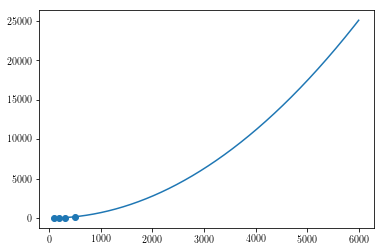

5.850575


In [3]:
x = np.linspace(100, 6000, 1000)
plt.scatter(n, t)
plt.plot(x, s(x))
plt.show()
print(np.round(s(5500),2) / 60 / 60)

In [4]:
print(np.round(s(5500),2) / 60 / 60 / 10)

0.5850575
